# Introduction

In this notebook, we will perform a comprehensive analysis of a dataset to evaluate the performance of various machine learning models. The analysis is divided into two main parts:

1. **Comparison of Preprocessed and Raw Dataset Performance for Random Forest**: We will first preprocess the dataset and compare the performance of the Random Forest classifier on the raw and preprocessed data.
2. **Comparison of SVM, Random Forest, and MLP Performance**: We will then compare the performance of three different machine learning models: Support Vector Machine (SVM), Random Forest (RF), and Multi-Layer Perceptron (MLP) on the dataset.

## Dataset Description

The dataset used in this analysis is the Diabetes Dataset. This dataset contains various health-related attributes of individuals and a target variable indicating whether the individual has diabetes. Below is a description of each column in the dataset:

- **Age**: Age of the individual.
- **BMI**: Body Mass Index of the individual.
- **Blood Pressure**: Blood pressure levels of the individual.
- **Cholesterol Levels**: Cholesterol levels of the individual.
- **Waist Circumference**: Waist circumference of the individual.
- **Weight Gain During Pregnancy**: Weight gain during pregnancy for female individuals.
- **Insulin Levels**: Insulin levels of the individual.
- **Liver Function Tests**: Results of liver function tests.
- **Urine Test**: Results of urine tests.
- **Autoantibodies**: Presence of autoantibodies.
- **Family History**: Family history of diabetes.
- **Physical Activity**: Level of physical activity.
- **Socioeconomic Factors**: Socioeconomic factors affecting the individual.
- **Alcohol Consumption**: Level of alcohol consumption.
- **Smoking Status**: Smoking status of the individual.
- **Digestive Enzyme Levels**: Levels of digestive enzymes.
- **Neurological Assessments**: Results of neurological assessments.
- **Pulmonary Function**: Pulmonary function levels.
- **Birth Weight**: Birth weight of the individual.
- **Target**: The target variable indicating whether the individual has diabetes (1) or not (0).

In the following sections, we will preprocess the data, train the models, and evaluate their performance based on accuracy, precision, and F1 score.

In [67]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import f1_score, precision_score, accuracy_score
from sklearn.discriminant_analysis import StandardScaler
import models
import time



The cell below loads the dataset

In [5]:
df = pd.read_csv('data/diabetes_dataset.csv')
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [6]:
df['Autoantibodies'].value_counts()

Autoantibodies
Negative    35058
Positive    34942
Name: count, dtype: int64

In [7]:
df.dtypes

Target                           object
Genetic Markers                  object
Autoantibodies                   object
Family History                   object
Environmental Factors            object
Insulin Levels                    int64
Age                               int64
BMI                               int64
Physical Activity                object
Dietary Habits                   object
Blood Pressure                    int64
Cholesterol Levels                int64
Waist Circumference               int64
Blood Glucose Levels              int64
Ethnicity                        object
Socioeconomic Factors            object
Smoking Status                   object
Alcohol Consumption              object
Glucose Tolerance Test           object
History of PCOS                  object
Previous Gestational Diabetes    object
Pregnancy History                object
Weight Gain During Pregnancy      int64
Pancreatic Health                 int64
Pulmonary Function                int64


In [8]:
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [9]:
df['Urine Test'].value_counts()

Urine Test
Protein Present    17628
Normal             17528
Glucose Present    17422
Ketones Present    17422
Name: count, dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

df.columns.shape

(34,)

In [7]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


In [14]:
df['Target'].value_counts()

Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

In [15]:
df['Liver Function Tests'].value_counts()   

Liver Function Tests
Normal      35019
Abnormal    34981
Name: count, dtype: int64

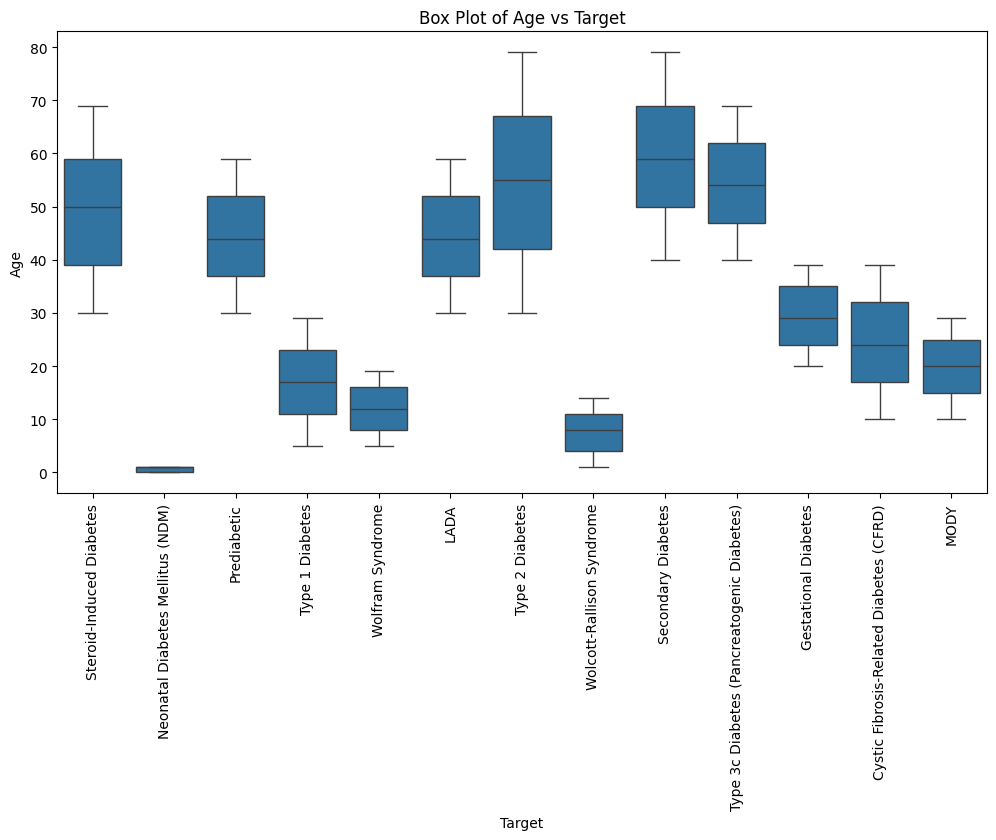

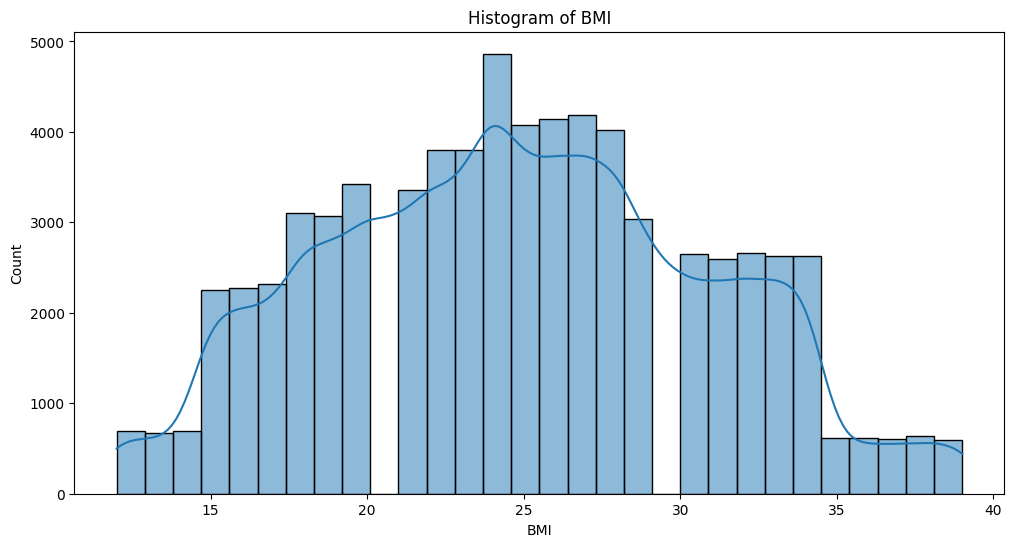

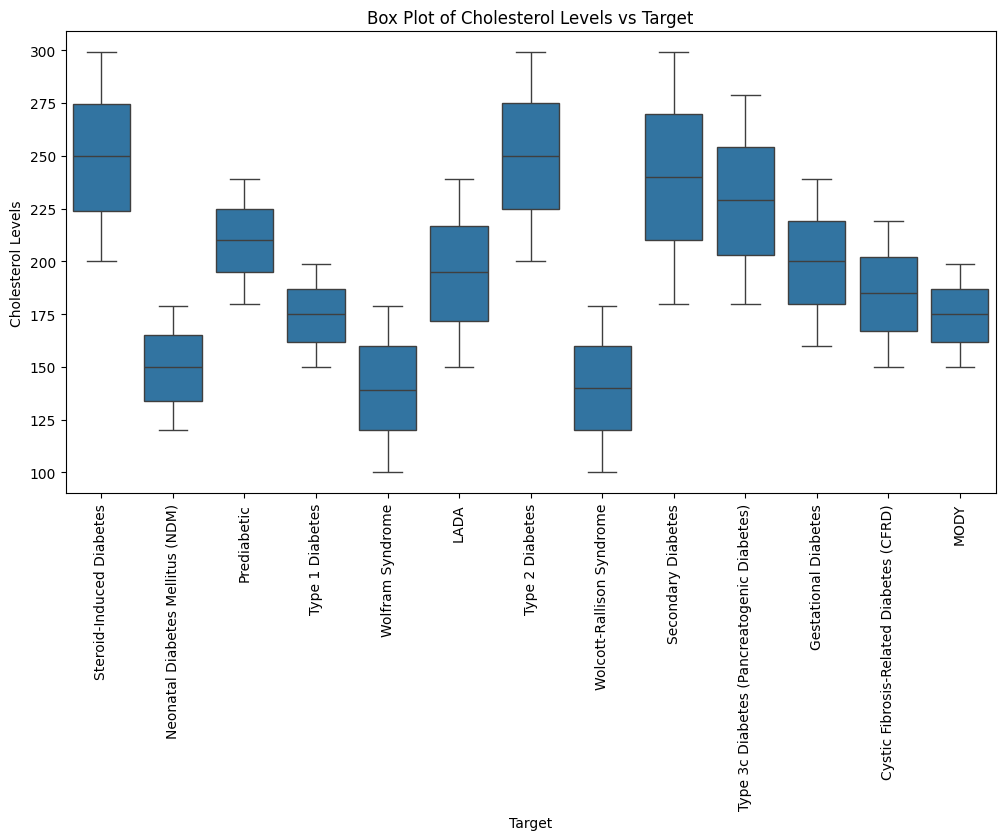

In [16]:
# Box Plot for Age vs Target
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.title('Box Plot of Age vs Target')
plt.xticks(rotation=90)
plt.show()


# Histogram for BMI
plt.figure(figsize=(12, 6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Histogram of BMI')
plt.show()


# Box Plot for Cholesterol Levels vs Target
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Cholesterol Levels', data=df)
plt.title('Box Plot of Cholesterol Levels vs Target')
plt.xticks(rotation=90)
plt.show()

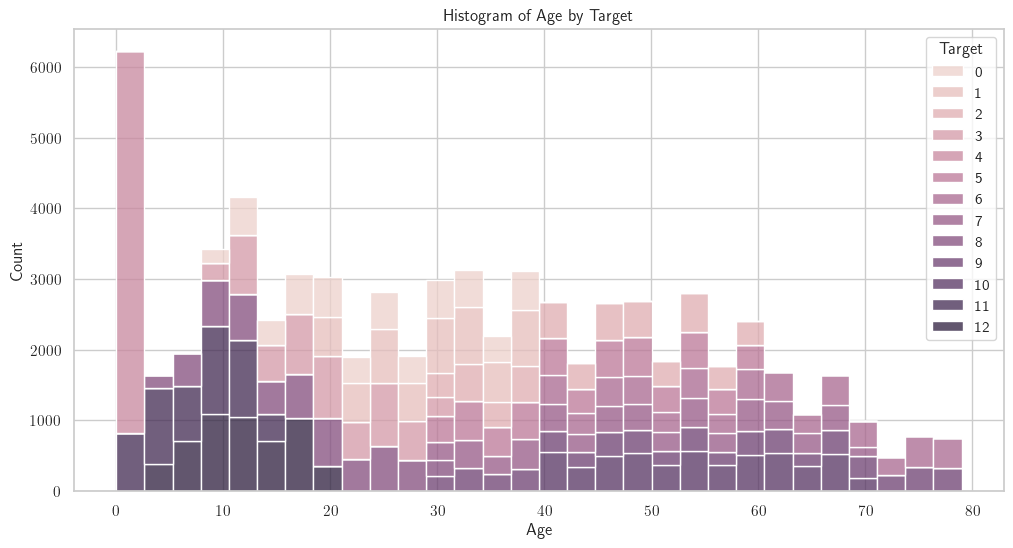

In [43]:
# Histogram for Target vs Age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Target', multiple='stack', bins=30)
plt.title('Histogram of Age by Target')
plt.show()

In [18]:
# Compute the correlation matrix#i 

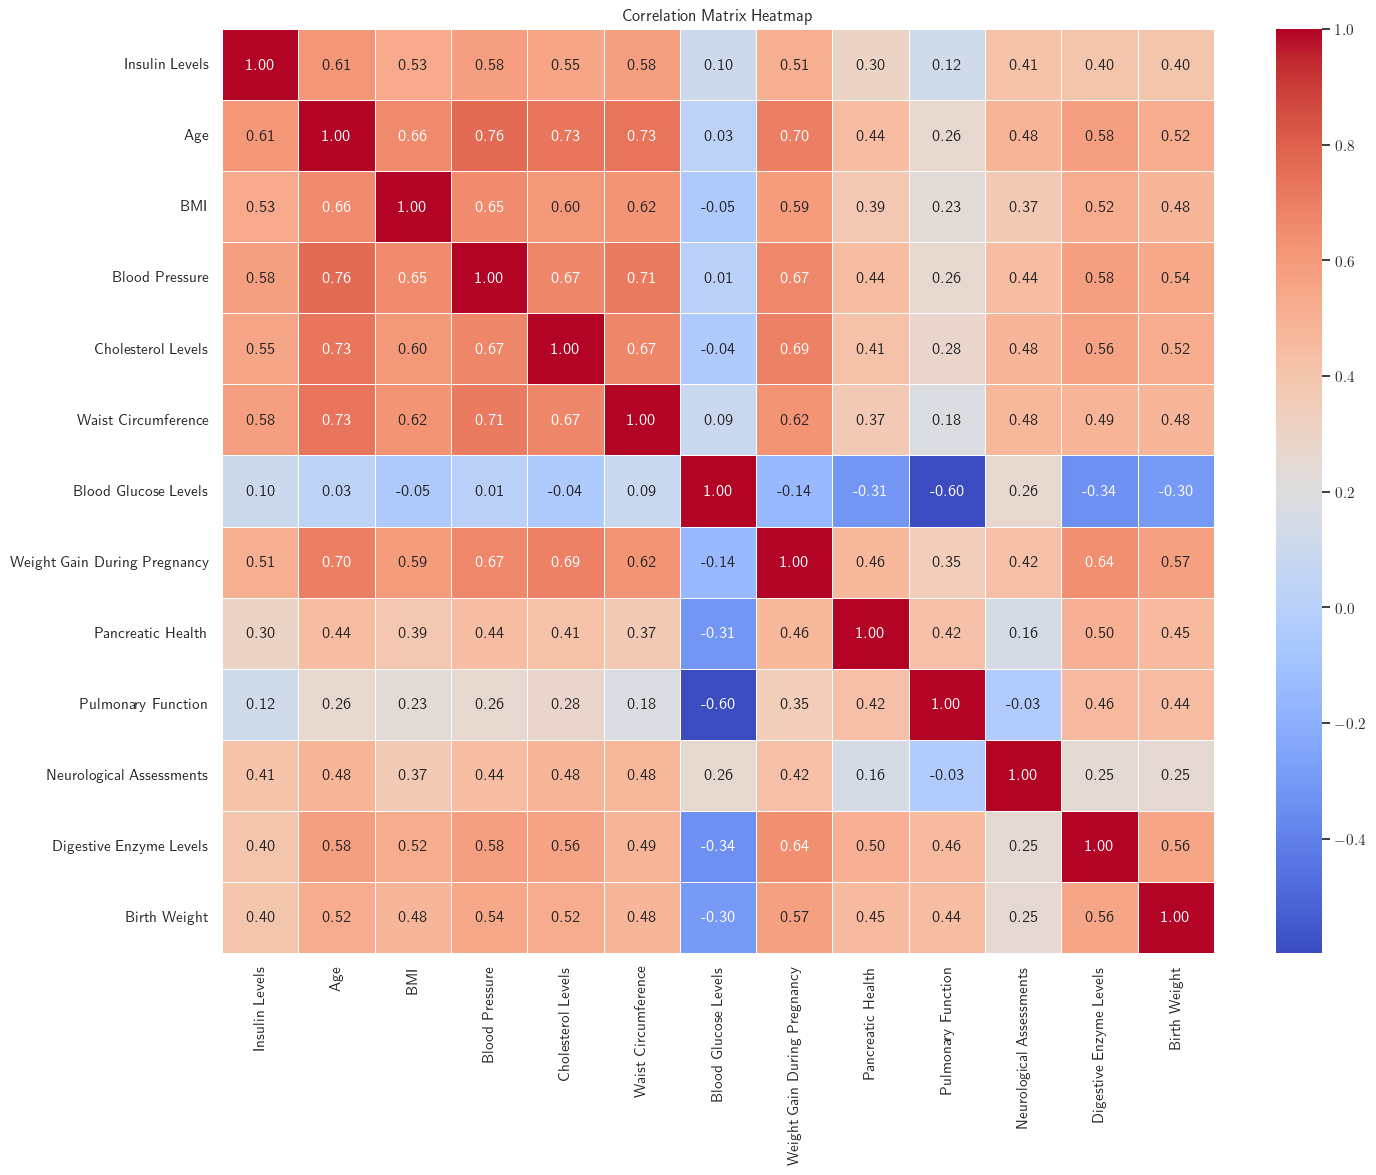

In [46]:
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

```markdown
\section{Visualizations}

In this section, we present several visualizations to better understand the dataset and the performance of various machine learning models.

\begin{itemize}
    \item \textbf{Box Plot of Age vs Target}: This box plot visualizes the distribution of ages for individuals with and without diabetes. It helps in identifying any significant age-related patterns in the target variable.
    \item \textbf{Histogram of BMI}: This histogram shows the distribution of Body Mass Index (BMI) values in the dataset. It provides insights into the overall health and weight distribution of the individuals.
    \item \textbf{Box Plot of Cholesterol Levels vs Target}: This box plot illustrates the distribution of cholesterol levels for individuals with and without diabetes. It helps in understanding the relationship between cholesterol levels and the target variable.
    \item \textbf{Histogram of Age by Target}: This histogram displays the age distribution for individuals with and without diabetes. It helps in identifying any age-related trends in the target variable.
    \item \textbf{Correlation Matrix Heatmap}: This heatmap visualizes the correlation between different numeric features in the dataset. It helps in identifying highly correlated features that might impact the performance of machine learning models.
    \item \textbf{Feature Importance based on Mutual Information}: This bar plot shows the importance of different features based on mutual information scores. It helps in identifying the most relevant features for predicting the target variable.
    \item \textbf{Feature Importances Based on Variance}: This bar plot displays the variance of different features in the dataset. It helps in understanding the variability of each feature.
    \item \textbf{Performance Metrics for Different Numbers of Principal Components}: This plot shows the accuracy, precision, and F1 score of the Random Forest model for different numbers of principal components. It helps in evaluating the effect of dimensionality reduction on model performance.
    \item \textbf{Model Performance Comparison}: This set of bar plots compares the accuracy, precision, and F1 score of different models (SVM, Random Forest, and MLP) on raw and scaled data. It helps in understanding the impact of data scaling on model performance.
    \item \textbf{Training Times for Different Models (Raw vs Scaled)}: This bar plot compares the training times of different models (SVM, Random Forest, and MLP) on raw and scaled data. It helps in evaluating the computational efficiency of each model.
\end{itemize}
```

### Features with High Correlation

The following pairs of features have a high correlation (correlation coefficient > 0.7):

1. **Age** and **Blood Pressure**: 0.763
2. **Age** and **Cholesterol Levels**: 0.730
3. **Age** and **Waist Circumference**: 0.734
4. **Age** and **Weight Gain During Pregnancy**: 0.698
5. **BMI** and **Age**: 0.663
6. **BMI** and **Blood Pressure**: 0.654
7. **Blood Pressure** and **Cholesterol Levels**: 0.675
8. **Blood Pressure** and **Waist Circumference**: 0.713
9. **Blood Pressure** and **Weight Gain During Pregnancy**: 0.667
10. **Cholesterol Levels** and **Waist Circumference**: 0.673
11. **Cholesterol Levels** and **Weight Gain During Pregnancy**: 0.692
12. **Waist Circumference** and **Weight Gain During Pregnancy**: 0.622
13. **Neurological Assessments** and **Digestive Enzyme Levels**: 0.639

### Features with High Correlation (> 0.6)

1. **Age** and **Insulin Levels**: 0.608
1. **BMI** and **Age**: 0.663
1. **Blood Pressure** and **Age**: 0.763
1. **Blood Pressure** and **BMI**: 0.654
1. **Cholesterol Levels** and **Age**: 0.730
1. **Cholesterol Levels** and **BMI**: 0.603
1. **Cholesterol Levels** and **Blood Pressure**: 0.675
1. **Waist Circumference** and **Age**: 0.734
1. **Waist Circumference** and **BMI**: 0.621
1. **Waist Circumference** and **Blood Pressure**: 0.713
1. **Waist Circumference** and **Cholesterol Levels**: 0.673
1. **Weight Gain During Pregnancy** and **Age**: 0.698
1. **Weight Gain During Pregnancy** and **Blood Pressure**: 0.667
1. **Weight Gain During Pregnancy** and **Cholesterol Levels**: 0.692
1. **Weight Gain During Pregnancy** and **Waist Circumference**: 0.622
1. **Digestive Enzyme Levels** and **Weight Gain During Pregnancy**: 0.639

### Features with High Inverse Correlation (< -0.6)

1. **Pulmonary Function** and **Blood Glucose Levels**: -0.598

In [21]:
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [22]:
df_temp = df.select_dtypes(include=['object']).columns
df_temp

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Physical Activity', 'Dietary Habits',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing',
       'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms'],
      dtype='object')

In [9]:
# Assuming df is your DataFrame
binary_variables = [col for col in df.columns if df[col].nunique() == 2]

print("Variables with only two categories:")
binary_variables

Variables with only two categories:


['Genetic Markers',
 'Autoantibodies',
 'Family History',
 'Environmental Factors',
 'Dietary Habits',
 'Ethnicity',
 'Smoking Status',
 'Glucose Tolerance Test',
 'History of PCOS',
 'Previous Gestational Diabetes',
 'Pregnancy History',
 'Cystic Fibrosis Diagnosis',
 'Steroid Use History',
 'Genetic Testing',
 'Liver Function Tests',
 'Early Onset Symptoms']

In [24]:
df['Family History'].value_counts()

Family History
Yes    35168
No     34832
Name: count, dtype: int64

In [10]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

binary_variables = [col for col in df.columns if df[col].nunique() == 2]
# Apply label encoding to each binary column
for column in binary_variables:
    df[column] = label_encoder.fit_transform(df[column])

df[binary_variables] = df[binary_variables].astype('int8')

In [26]:
df.select_dtypes(include=['object']).columns


Index(['Target', 'Physical Activity', 'Socioeconomic Factors',
       'Alcohol Consumption', 'Urine Test'],
      dtype='object')

In [11]:
df_temp = df.select_dtypes(include=['object'])
df_temp = df_temp.drop('Target', axis=1)
df_temp.value_counts()

Physical Activity  Socioeconomic Factors  Alcohol Consumption  Urine Test     
High               High                   Moderate             Ketones Present    695
Low                Medium                 Low                  Ketones Present    695
Moderate           Medium                 Moderate             Normal             691
Low                Medium                 Low                  Normal             690
                                                               Protein Present    686
                                                                                 ... 
High               Medium                 High                 Normal             607
Low                High                   High                 Normal             607
                   Low                    High                 Glucose Present    602
Moderate           High                   High                 Glucose Present    590
Low                Medium                 Moderate           

In [12]:
# Replace 'Medium' with 'Moderate' in 'Socioeconomic Factors' column
df.replace({'Socioeconomic Factors': {'Medium': 'Moderate'}}, inplace=True)

df['Socioeconomic Factors'].value_counts()

Socioeconomic Factors
Moderate    23413
High        23304
Low         23283
Name: count, dtype: int64

In [13]:
# Columns to encode
columns_to_encode = ['Physical Activity', 'Socioeconomic Factors', 'Alcohol Consumption']

# Define the mapping for ordinal encoding
mapping = [['Low', 'Moderate', 'High']]

# Initialize the OrdinalEncoder with the defined mapping
encoder = OrdinalEncoder(categories=mapping)

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column].values.reshape(-1, 1))


df[columns_to_encode] = df[columns_to_encode].astype('int8')
df[columns_to_encode].head()


,Physical Activity,Socioeconomic Factors,Alcohol Consumption
0,2,1,2
1,2,2,1
2,2,1,2
3,0,2,1
4,2,0,1


In [14]:
print(df.select_dtypes(include=['object']).columns)
print(df['Target'].value_counts())
print(df['Urine Test'].value_counts())


Index(['Target', 'Urine Test'], dtype='object')
Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64
Urine Test
Protein Present    17628
Normal             17528
Glucose Present    17422
Ketones Present    17422
Name: count, dtype: int64


In [15]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the target column
df['Target'] = label_encoder.fit_transform(df['Target'])
df['Target'] = df['Target'].astype('int8') 

df = pd.get_dummies(df, columns=['Urine Test'], prefix='Urine')
df.select_dtypes(include = 'bool').columns

Index(['Urine_Glucose Present', 'Urine_Ketones Present', 'Urine_Normal',
       'Urine_Protein Present'],
      dtype='object')

In [16]:
columns_to_cast = df.select_dtypes(include = 'bool').columns
df[columns_to_cast] = df[columns_to_cast].astype('int8')
df[columns_to_cast].dtypes

Urine_Glucose Present    int8
Urine_Ketones Present    int8
Urine_Normal             int8
Urine_Protein Present    int8
dtype: object

Mutual Information Scores:
Age                             1.180343
Blood Pressure                  0.899650
Weight Gain During Pregnancy    0.881764
Blood Glucose Levels            0.881748
Waist Circumference             0.837402
Cholesterol Levels              0.803200
Digestive Enzyme Levels         0.713417
BMI                             0.713145
Pulmonary Function              0.611937
Insulin Levels                  0.590197
dtype: float64


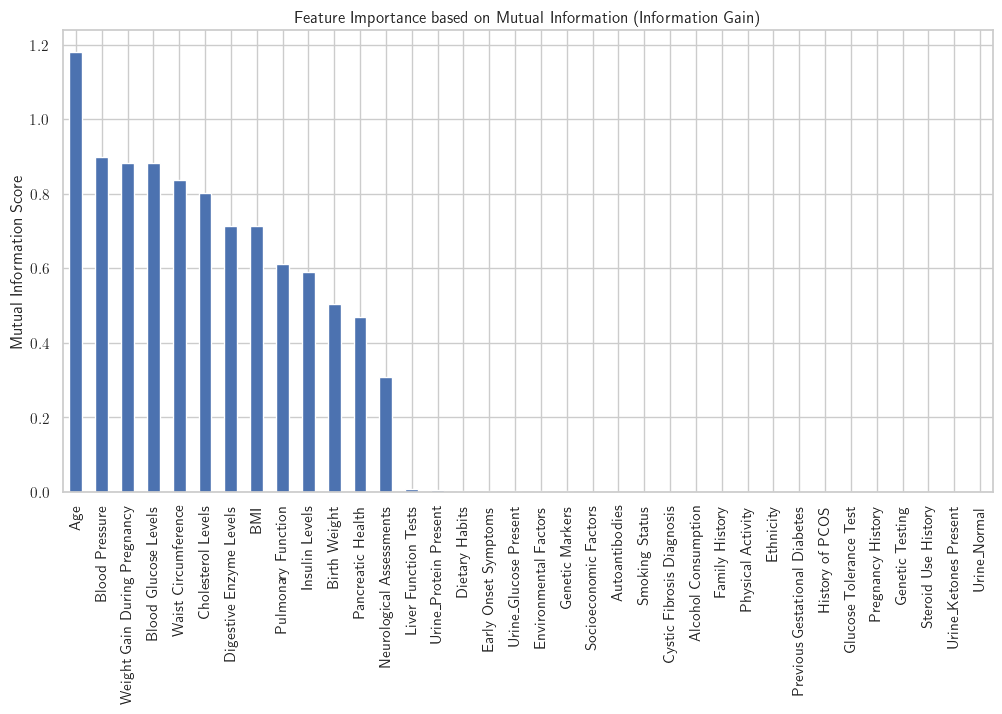

In [47]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt


X = df.drop('Target', axis=1)
y = df['Target']


# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create a Series with feature names and their MI scores
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Display the scores
print("Mutual Information Scores:")
print(mi_scores.head(10))

# Plot the MI scores
plt.figure(figsize=(12, 6))
mi_scores.plot.bar()
plt.ylabel('Mutual Information Score')
plt.title('Feature Importance based on Mutual Information (Information Gain)')
plt.show()

Feature Variances:
Blood Glucose Levels             2319.919962
Cholesterol Levels               1983.140552
Age                               442.815140
Pancreatic Health                 399.387550
Blood Pressure                    397.803022
Digestive Enzyme Levels           376.014342
Pulmonary Function                143.175580
Insulin Levels                    116.334604
Weight Gain During Pregnancy       92.796541
Waist Circumference                46.287078
BMI                                36.171031
Alcohol Consumption                 0.666533
Socioeconomic Factors               0.665538
Physical Activity                   0.665335
Neurological Assessments            0.462609
Ethnicity                           0.250004
Liver Function Tests                0.250003
Dietary Habits                      0.250003
Previous Gestational Diabetes       0.250003
Smoking Status                      0.250003
Autoantibodies                      0.250003
Early Onset Symptoms                

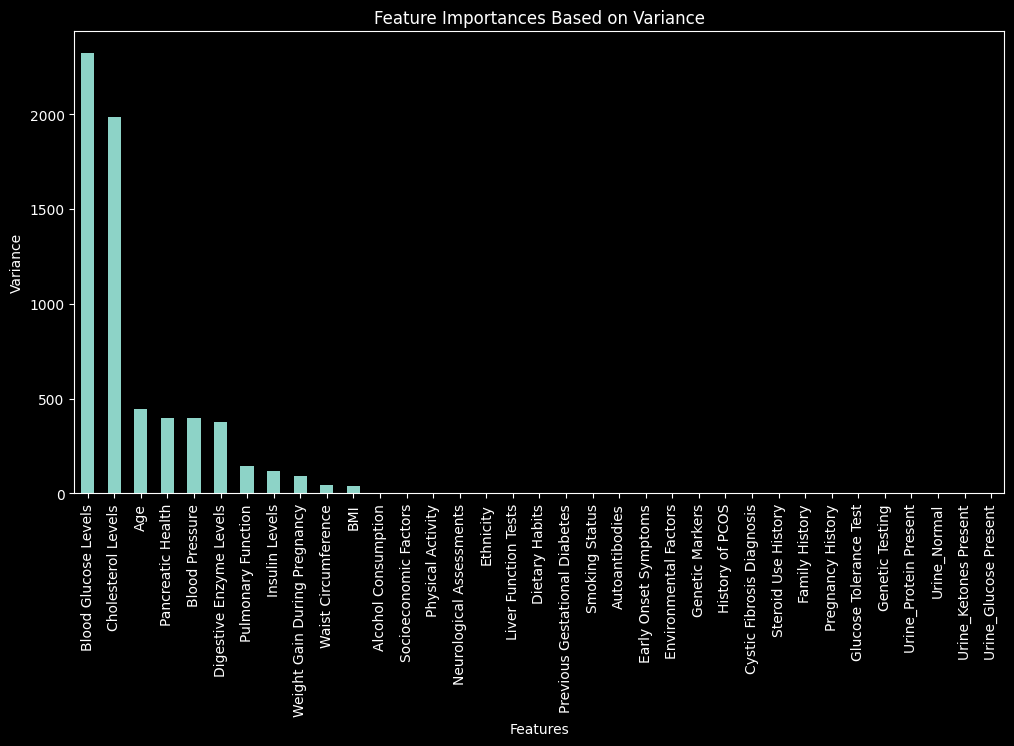

In [17]:
# Features and target
X = df.drop('Target', axis=1)
y = df['Target']
X = X.drop('Birth Weight', axis=1)

# Compute variance for each feature
variances = X.var()

# Create a Series with feature names and their variances
variance_series = pd.Series(variances, index=X.columns)
variance_series = variance_series.sort_values(ascending=False)

# Display the variances
print("Feature Variances:")
print(variance_series)

# Plot the feature importances based on variance
plt.figure(figsize=(12, 6))
variance_series.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Feature Importances Based on Variance')
plt.show()

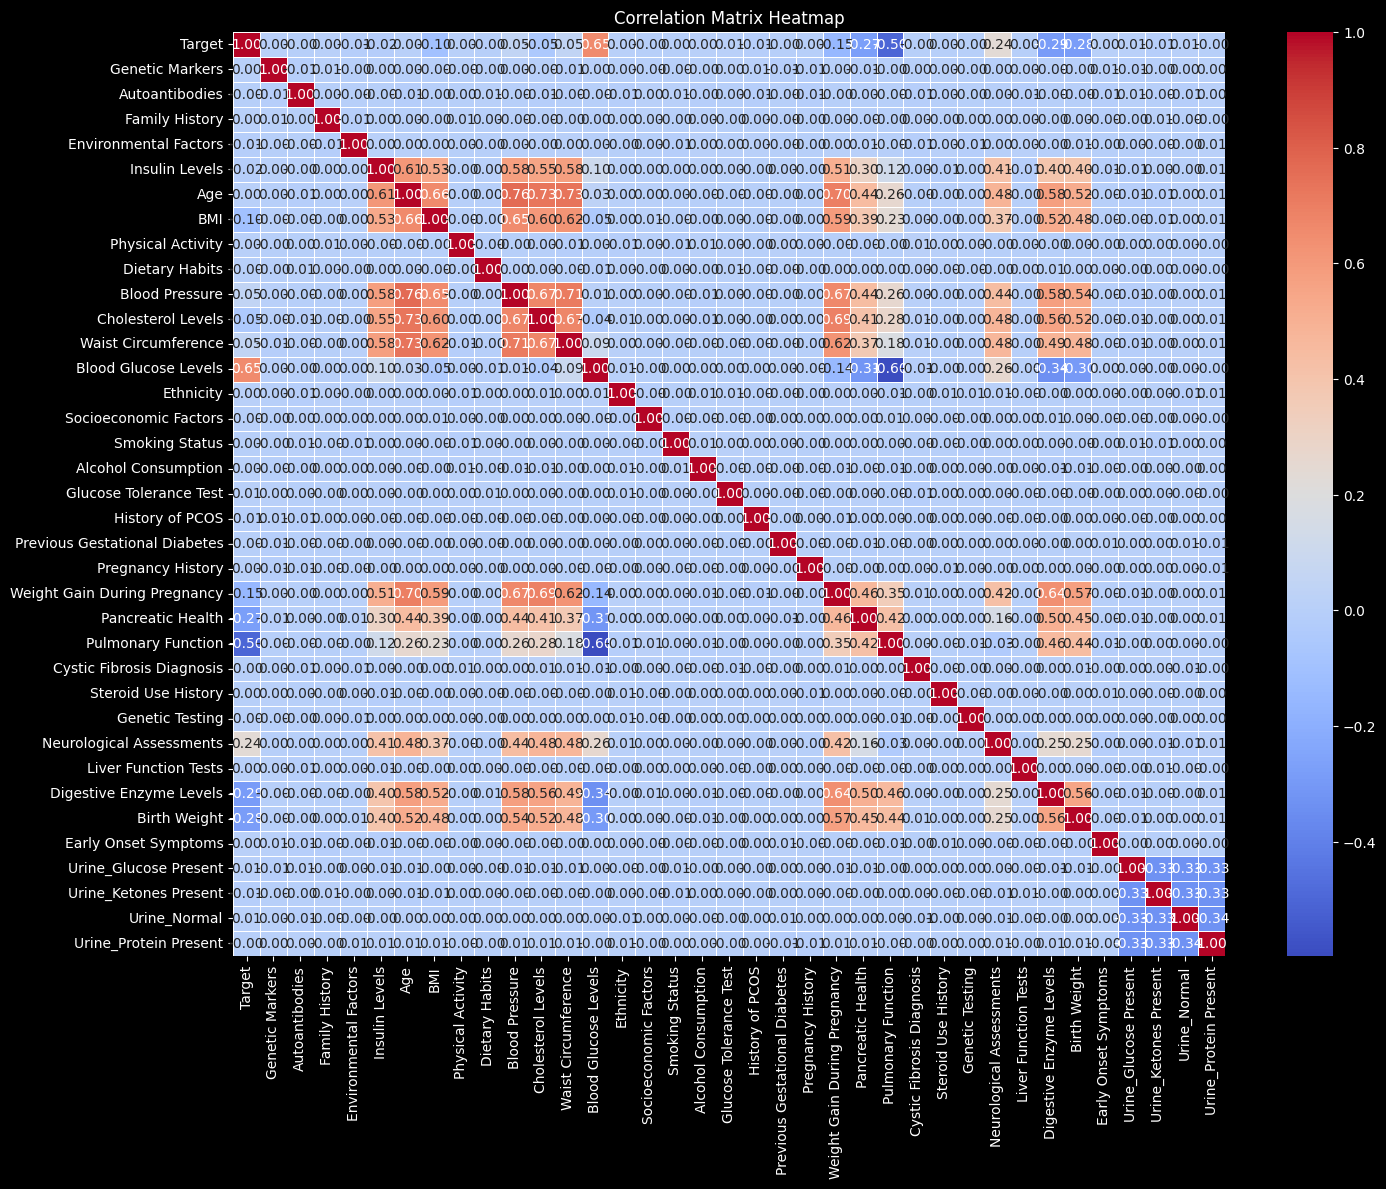

In [18]:
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
# Generate a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Splitting the dataset

In [17]:
# Features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# # Features and target


# from sklearn.feature_selection import RFE


# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# # Initialize RFE with the Random Forest classifier
# rfe = RFE(estimator=rf, n_features_to_select=10, verbose=1)

# # Fit RFE
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = X.columns[rfe.support_]

# print("Selected Features:", selected_features)

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import time

def evaluate_rf_with_pca(X_train, X_test, y_train, y_test, n_components_list=[1, 2, 4, 8, 16]):
    """
    Evaluate Random Forest performance with PCA on a dataset.

    Parameters:
    X_train (pd.DataFrame): The training features.
    X_test (pd.DataFrame): The testing features.
    y_train (pd.Series): The training target.
    y_test (pd.Series): The testing target.
    n_components_list (list): List of numbers of principal components to test.

    Returns:
    metrics (pd.DataFrame): DataFrame containing accuracy, precision, F1 score, and training time.
    variance_df (pd.DataFrame): DataFrame containing the number of PCA components and their corresponding variance ratios.
    """


    # Feature selection using information gain
    mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
    # Select top k features
    k = 20 # Number of features to select
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)

    # Step 3: Transform both training and testing data
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
   

    # Initialize lists to store metrics
    accuracy_list = []
    precision_list = []
    f1_list = []
    training_times = []

    # Initialize lists to store variance ratios
    variance_ratios = []

    # Loop over different numbers of principal components
    for n_components in n_components_list:
        # Initialize PCA
        pca = PCA(n_components=n_components)
        
        # Fit PCA on the training set
        X_train_pca = pca.fit_transform(X_train)
        
        # Transform the testing set using the PCA fitted on the training set
        X_test_pca = pca.transform(X_test)
        
        # Initialize the Random Forest classifier
        rf = RandomForestClassifier(random_state=42, n_jobs=-1)
        
        start_time = time.time()
        # Train the model with PCA-transformed features
        rf.fit(X_train_pca, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Predict on the test set
        y_pred = rf.predict(X_test_pca)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store results
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        f1_list.append(f1)
        training_times.append(training_time)
        variance_ratios.append(pca.explained_variance_ratio_.sum())

    # Add results for the original data without PCA
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    start_time = time.time()
    rf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1_list.append(f1)
    training_times.append(training_time)

    # Add results for the information gain selected features
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    start_time = time.time()
    rf.fit(X_train_selected, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred = rf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1_list.append(f1)
    training_times.append(training_time)

    # Create a DataFrame to store the metrics results
    n_components_list_metrics = n_components_list + ['NO PCA', 'Information Gain']
    metrics = pd.DataFrame({
        'accuracy': accuracy_list,
        'precision': precision_list,
        'F1': f1_list,
        'Training time (s)': training_times
    }, index=n_components_list_metrics)

    # Create a DataFrame to store the variance ratios
    variance_df = pd.DataFrame({
        'PCA components': n_components_list,
        'Variance Ratio': variance_ratios
    })

    return metrics, variance_df


In [76]:
# Example usage
# Assuming X_train, X_test, y_train, y_test are already defined and scaled
metrics, variance_df = evaluate_rf_with_pca(X_train, X_test, y_train, y_test)
metrics


,accuracy,precision,F1,Training time (s)
1,0.144143,0.143830,0.143933,15.328464
2,0.343643,0.339142,0.340731,9.905025
4,0.575500,0.574102,0.571325,14.557272
8,0.704071,0.706801,0.703308,19.476676
16,0.797786,0.800002,0.796840,43.983001
NO PCA,0.900000,0.905193,0.898847,11.305976
Information Gain,0.900500,0.905592,0.899344,12.017790


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

metrics_scaled, variance_df = evaluate_rf_with_pca(X_train_scaled, X_test_scaled, y_train, y_test)

NameError: name 'metrics_scaled' is not defined

In [81]:
metrics['type'] = 'raw'
metrics_scaled['type'] = 'scaled'

# Merge the two DataFrames
merged_metrics = pd.concat([metrics, metrics_scaled])

# Sort the merged DataFrame by index as strings
merged_metrics = merged_metrics.sort_index(key=lambda x: x.astype(str))

# Save the merged DataFrame to a LaTeX file
merged_metrics.to_latex('merged_metrics.tex')
merged_metrics

,accuracy,precision,F1,Training time (s),type
1,0.144143,0.143830,0.143933,15.328464,raw
1,0.315500,0.315719,0.315574,14.015227,scaled
16,0.797786,0.800002,0.796840,43.983001,raw
16,0.521786,0.516591,0.517340,39.240382,scaled
2,0.343643,0.339142,0.340731,9.905025,raw
2,0.483500,0.481032,0.481920,9.194185,scaled
4,0.575500,0.574102,0.571325,14.557272,raw
4,0.501071,0.496716,0.497940,19.373864,scaled
8,0.704071,0.706801,0.703308,19.476676,raw
8,0.519929,0.515141,0.516138,21.565820,scaled


In [60]:
# Scale the data
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Figure size 1200x600 with 0 Axes>

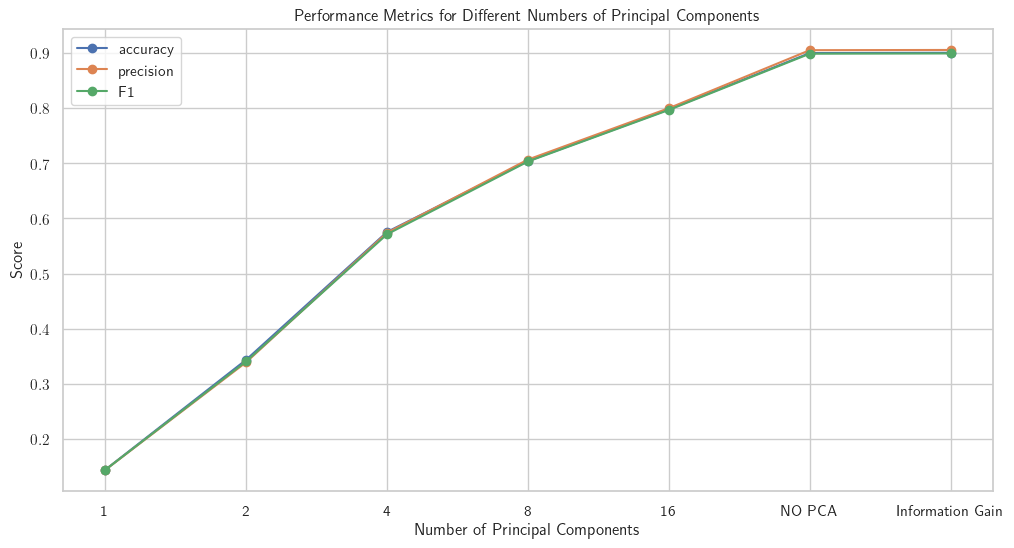

,accuracy,precision,F1,Training time (s),type
1,0.144143,0.143830,0.143933,15.328464,raw
2,0.343643,0.339142,0.340731,9.905025,raw
4,0.575500,0.574102,0.571325,14.557272,raw
8,0.704071,0.706801,0.703308,19.476676,raw
16,0.797786,0.800002,0.796840,43.983001,raw
NO PCA,0.900000,0.905193,0.898847,11.305976,raw
Information Gain,0.900500,0.905592,0.899344,12.017790,raw


In [90]:
# Plot the results
plt.figure(figsize=(12, 6))

metrics_temp = metrics.drop(columns=['Training time (s)', 'type'], axis=1)

metrics_temp.plot(marker='o', figsize=(12, 6));

plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Numbers of Principal Components')
plt.legend()
plt.grid(True)
plt.show();

metrics

<class 'pandas.core.frame.DataFrame'>


<Figure size 1200x600 with 0 Axes>

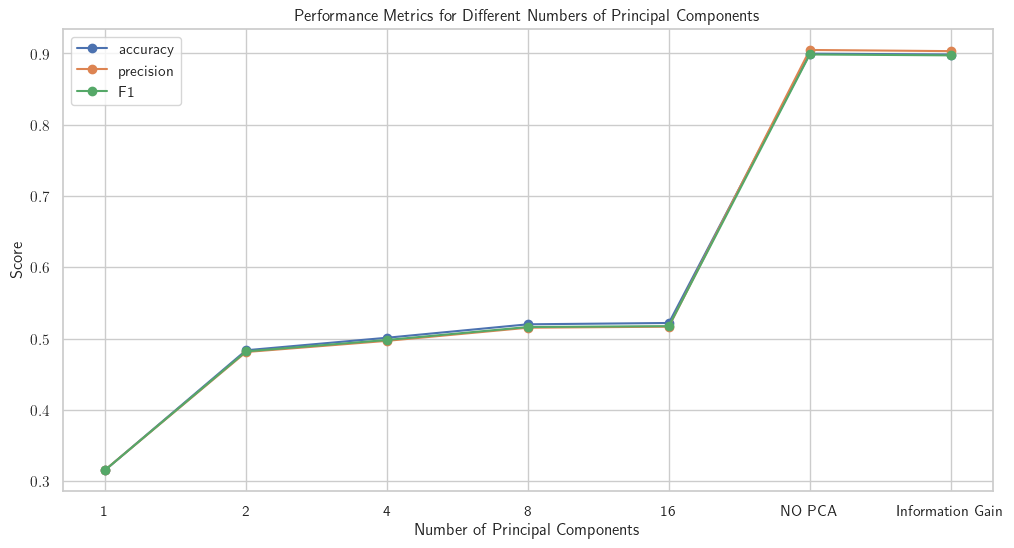

,accuracy,precision,F1,Training time (s),type
1,0.144143,0.143830,0.143933,15.328464,raw
2,0.343643,0.339142,0.340731,9.905025,raw
4,0.575500,0.574102,0.571325,14.557272,raw
8,0.704071,0.706801,0.703308,19.476676,raw
16,0.797786,0.800002,0.796840,43.983001,raw
NO PCA,0.900000,0.905193,0.898847,11.305976,raw
Information Gain,0.900500,0.905592,0.899344,12.017790,raw


In [89]:
# Plot the results
plt.figure(figsize=(12, 6))

metrics_scaled_temp = metrics_scaled.drop(columns=['Training time (s)', 'type'], axis=1)

metrics_scaled_temp.plot(marker='o', figsize=(12, 6));

plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Numbers of Principal Components')
plt.legend()
plt.grid(True)
plt.show();

metrics

## Step 2: Train and evaluate SVM, RF, and MLP on the raw data

In [43]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize models
svm = SVC()
rf = RandomForestClassifier()
mlp = MLPClassifier()

# Train models
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Predict
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)
mlp_pred = mlp.predict(X_test)

# Evaluate
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, f1

svm_metrics = evaluate_model(y_test, svm_pred)
rf_metrics = evaluate_model(y_test, rf_pred)
mlp_metrics = evaluate_model(y_test, mlp_pred)

print("SVM (Raw Data):", svm_metrics)
print("RF (Raw Data):", rf_metrics)
print("MLP (Raw Data):", mlp_metrics)

/home/dd/PycharmProjects/Diabetes-Dataset-Analysis/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM (Raw Data): (0.5645, np.float64(0.5799475554822358), np.float64(0.5491582730607871))
RF (Raw Data): (0.9010714285714285, np.float64(0.9064345195044031), np.float64(0.8998648676426615))
MLP (Raw Data): (0.7471428571428571, np.float64(0.7800293938404748), np.float64(0.7416114216822985))


NameError: name 'svm_metrics' is not defined

## Step 3: Scale the data and train and evaluate the models again

In [44]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models on scaled data
svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

# Predict
svm_pred_scaled = svm.predict(X_test_scaled)
rf_pred_scaled = rf.predict(X_test_scaled)
mlp_pred_scaled = mlp.predict(X_test_scaled)

# Evaluate
svm_metrics_scaled = evaluate_model(y_test, svm_pred_scaled)
rf_metrics_scaled = evaluate_model(y_test, rf_pred_scaled)
mlp_metrics_scaled = evaluate_model(y_test, mlp_pred_scaled)

print("SVM (Scaled Data):", svm_metrics_scaled)
print("RF (Scaled Data):", rf_metrics_scaled)
print("MLP (Scaled Data):", mlp_metrics_scaled)

/home/dd/PycharmProjects/Diabetes-Dataset-Analysis/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM (Scaled Data): (0.7830714285714285, np.float64(0.7839678880895077), np.float64(0.7824428269235975))
RF (Scaled Data): (0.8997142857142857, np.float64(0.9049298002732399), np.float64(0.8985723296050137))
MLP (Scaled Data): (0.8512142857142857, np.float64(0.8521124630888597), np.float64(0.8504367614691924))


## Step 4: Tune hyperparameters for each model and evaluate them again

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['tanh', 'relu']}

# Grid search for SVM
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1_weighted')
svm_grid.fit(X_train_scaled, y_train)
svm_best = svm_grid.best_estimator_

# Grid search for RF
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1_weighted')
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_

# Grid search for MLP
mlp_grid = GridSearchCV(MLPClassifier(), mlp_params, cv=5, scoring='f1_weighted')
mlp_grid.fit(X_train_scaled, y_train)
mlp_best = mlp_grid.best_estimator_

# Predict with best models
svm_pred_best = svm_best.predict(X_test_scaled)
rf_pred_best = rf_best.predict(X_test_scaled)
mlp_pred_best = mlp_best.predict(X_test_scaled)

# Evaluate
svm_metrics_best = evaluate_model(y_test, svm_pred_best)
rf_metrics_best = evaluate_model(y_test, rf_pred_best)
mlp_metrics_best = evaluate_model(y_test, mlp_pred_best)

print("SVM (Best Params):", svm_metrics_best)
print("RF (Best Params):", rf_metrics_best)
print("MLP (Best Params):", mlp_metrics_best)

## Plotting all on a barplot

In [ ]:


# Define a function to plot the metrics
def plot_metrics(metrics, title):
    df = pd.DataFrame(metrics, columns=['Model', 'Data Type', 'Accuracy', 'Precision', 'F1 Score'])
    df = df.melt(id_vars=['Model', 'Data Type'], var_name='Metric', value_name='Score')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Metric', y='Score', hue='Model', data=df, ci=None)
    plt.title(title)
    plt.ylim(0, 1)
    plt.legend(loc='upper right')
    plt.show()

# Collect metrics
metrics = [
    ['SVM', 'Raw Data', *svm_metrics],
    ['RF', 'Raw Data', *rf_metrics],
    ['MLP', 'Raw Data', *mlp_metrics],
    ['SVM', 'Scaled Data', *svm_metrics_scaled],
    ['RF', 'Scaled Data', *rf_metrics_scaled],
    ['MLP', 'Scaled Data', *mlp_metrics_scaled],
    ['SVM', 'Best Params', *svm_metrics_best],
    ['RF', 'Best Params', *rf_metrics_best],
    ['MLP', 'Best Params', *mlp_metrics_best]
]

# Plot the metrics
plot_metrics(metrics, 'Model Comparison on Different Data Types')

## NEW

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import models

# Initialize models
models_dict = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier()
}

In [22]:
import joblib
from sklearn.metrics import f1_score, precision_score, accuracy_score
import os
import time




def train_and_save_model(model, model_name, X_train, y_train, data_type, directory='models'):
    """Train the model and save it using joblib."""

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time


    if not os.path.exists(directory):
        os.makedirs(directory)
    
    path = os.path.join(directory, f'{model_name}_{data_type}_model.joblib')
    joblib.dump(model, path)

    # Return training time
    return training_time

def load_and_evaluate_model(model_name, data_type, X_test, y_test, directory='models'):
    """Load the model and evaluate its performance."""

    path=os.path.join(directory, f'{model_name}_{data_type}_model.joblib')
    loaded_model = joblib.load(path)
    predictions = loaded_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    return accuracy, precision, f1

def store_metrics(metrics, model_name, data_type, accuracy, precision, f1, training_time):
    """Store the evaluation metrics in the metrics list."""
    metrics.append({
        'Model': model_name,
        'Data Type': data_type,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1,
        'Training time' : training_time
    })

In [20]:
# Train and save models on raw data
training_times = {}

for name, model in models_dict.items():
    training_time = train_and_save_model(model, name, X_train, y_train, 'raw')
    training_times[f'{name}_raw_model'] = training_time

In [21]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and save models on scaled data
for name, model in models_dict.items():
    training_time = train_and_save_model(model, name, X_train_scaled, y_train, 'scaled')
    training_times[f'{name}_scaled_model'] = training_time

/home/dd/PycharmProjects/Diabetes-Dataset-Analysis/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
# List to store metrics
metrics = []

# Load and evaluate models on raw data
for name in models_dict.keys():
    accuracy, precision, f1 = models.load_and_evaluate_model(name, 'raw', X_test, y_test)
    store_metrics(metrics, name, 'Raw', accuracy, precision, f1, training_times[f'{name}_raw_model'])

# Load and evaluate models on scaled data
for name in models_dict.keys():
    accuracy, precision, f1 = load_and_evaluate_model(name, 'scaled', X_test_scaled, y_test)
    store_metrics(metrics, name, 'Scaled', accuracy, precision, f1, training_times[f'{name}_scaled_model'])

In [24]:
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df

,Model,Data Type,Accuracy,Precision,F1 Score,Training time
0,RandomForest,Raw,0.899500,0.904680,0.898275,12.982595
1,SVM,Raw,0.564500,0.579948,0.549158,564.598290
2,MLP,Raw,0.672429,0.729756,0.631896,13.881731
3,RandomForest,Scaled,0.899143,0.904634,0.898016,12.590574
4,SVM,Scaled,0.783071,0.783968,0.782443,154.534756
5,MLP,Scaled,0.843571,0.845191,0.842303,111.646713


In [36]:
metrics_df.to_latex('times.tex')

In [27]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",  # Use pdflatex or xelatex
    "text.usetex": True,          # Use LaTeX for rendering text
    "pgf.rcfonts": False,         # Don't use Matplotlib's RC fonts
})

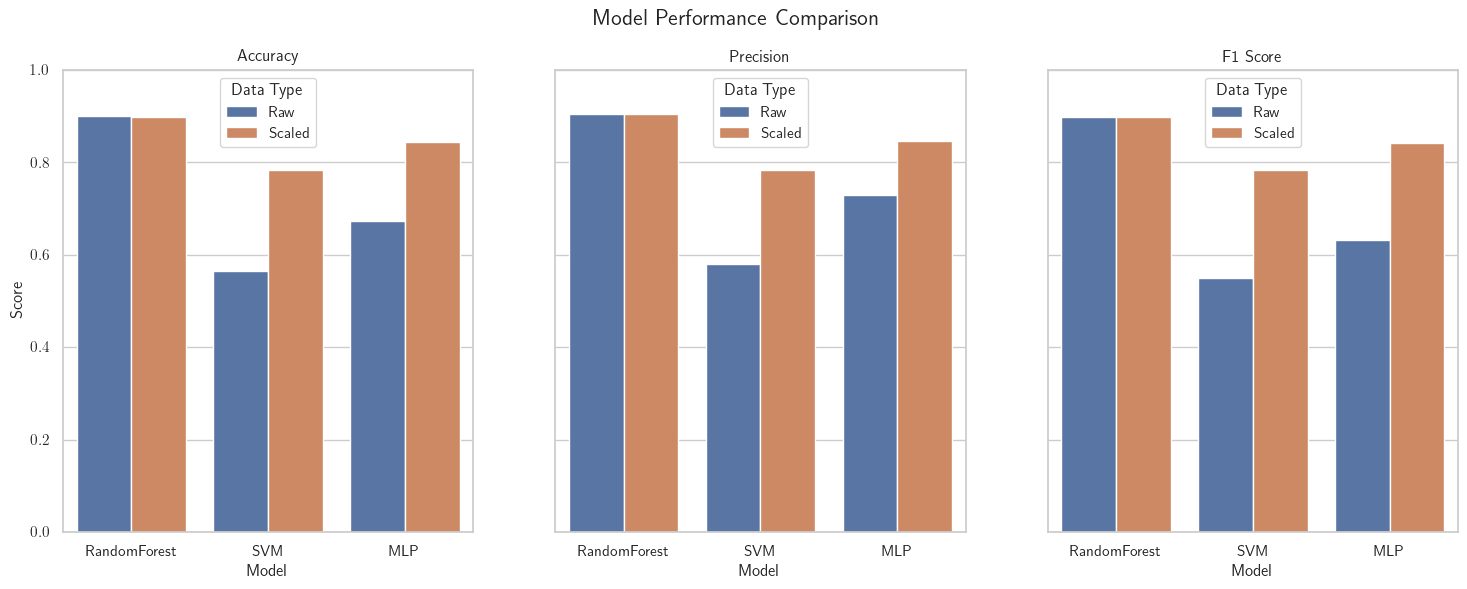

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for easier plotting with seaborn
metrics_melted = metrics_df.melt(id_vars=['Model', 'Data Type'], var_name='Metric', value_name='Score')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot Accuracy
sns.barplot(x='Model', y='Score', hue='Data Type', data=metrics_melted[metrics_melted['Metric'] == 'Accuracy'], ax=axes[0])
axes[0].set_title('Accuracy')
axes[0].set_ylim(0, 1)

# Plot Precision
sns.barplot(x='Model', y='Score', hue='Data Type', data=metrics_melted[metrics_melted['Metric'] == 'Precision'], ax=axes[1])
axes[1].set_title('Precision')
axes[1].set_ylim(0, 1)

# Plot F1 Score
sns.barplot(x='Model', y='Score', hue='Data Type', data=metrics_melted[metrics_melted['Metric'] == 'F1 Score'], ax=axes[2])
axes[2].set_title('F1 Score')
axes[2].set_ylim(0, 1)

# Set the overall title
fig.suptitle('Model Performance Comparison', fontsize=16)
# Display the plot
plt.show()

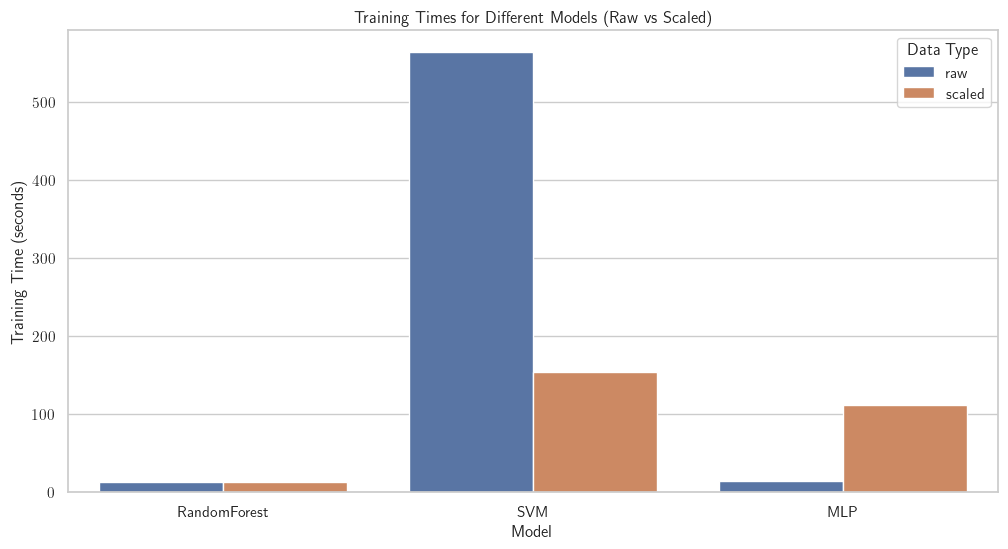

In [34]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Convert training times dictionary to DataFrame
training_times_df = pd.DataFrame(list(training_times.items()), columns=['Model', 'Training Time'])

# Split the Model column into Model Name and Data Type
training_times_df[['Model Name', 'Data Type']] = training_times_df['Model'].str.rsplit('_', n=2, expand=True).iloc[:, :2]

# Drop the original Model column
training_times_df.drop(columns=['Model'], inplace=True)

# Plot the training times
plt.figure(figsize=(12, 6))
sns.barplot(x='Model Name', y='Training Time', hue='Data Type', data=training_times_df)
plt.title('Training Times for Different Models (Raw vs Scaled)')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.legend(title='Data Type')
fig.savefig('model_time_scaled_raw.pgf')
plt.show()

In [ ]:
# Define hyperparameters for SVM
svm_hyperparameters = [
    {'C': 0.1, 'kernel': 'linear'},
    {'C': 1, 'kernel': 'linear'},
    {'C': 10, 'kernel': 'linear'},
    {'C': 0.1, 'kernel': 'rbf'},
    {'C': 1, 'kernel': 'rbf'},
    {'C': 10, 'kernel': 'rbf'}
]

# Train and save SVM models with different hyperparameters
for params in svm_hyperparameters:
    model_name = f"SVM_C{params['C']}_kernel{params['kernel']}"
    svm = SVC(**params)
    train_and_save_model(svm, model_name, X_train, y_train, 'raw')

opw
